# SVM
## 优缺点
### 优点
- Effective in high dimensional spaces. 在高维空间中非常高效
- Still effective in cases where number of dimensions is greater than the number of samples. 样本不足时仍然高效
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient. 节省存储空间
- Versatile: different Kernel function can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels. 可以选择或者自定义核函数

### 缺点
- If the number of features is much greater than the number of samples, aviod over-fitting in choosing Kernel functions and regularization term is crucial. 如果样本少，特征多，那么核函数和正则化因子一定要认真选取
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. SVM不能提供概率，想要概率只能通过交叉验证来实现

In [2]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
clf.predict([[2, 2]])

array([1])

In [4]:
clf.support_vectors_

array([[ 0.,  0.],
       [ 1.,  1.]])

In [5]:
clf.support_

array([0, 1])

In [6]:
# get number of support vectors for each class
clf.n_support_

array([1, 1])

In [7]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
dec = clf.decision_function([[1]])

In [20]:
dec.shape

(1, 6)

In [21]:
clf.decision_function_shape = 'ovr'
dec = clf.decision_function([[1]])
dec.shape

(1, 4)

In [22]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = svm.SVR()
clf.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
clf.predict([[1, 1]])

array([ 1.5])

## Density estimation, novelty detection(密度估计，奇异值检测)
One-class SVM is used for novelty detection, that is, given a set of samples, it will detect the soft boundary of that set so as to classify new point as belonging to that set or not. The class that implements this is called OneClassSVM.

In this case, as it is a type of unsupervised learning, the fit method will only take as input an array X, as there are no class labels.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [25]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

In [26]:
xx.shape

(500, 500)

In [30]:
X = 0.3 * np.random.randn(100, 2)

In [31]:
X.shape

(100, 2)

In [32]:
X[0]

array([ 0.5446903 ,  0.00715848])

In [33]:
X_train = np.r_[X + 2, X - 2]

In [34]:
X_train.shape

(200, 2)

In [35]:
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

In [36]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [37]:
clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

In [38]:
temp = np.c_[xx.ravel(), yy.ravel()]

In [39]:
temp.shape

(250000, 2)

In [40]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

In [41]:
Z.shape

(250000, 1)

In [42]:
Z = Z.reshape(xx.shape)

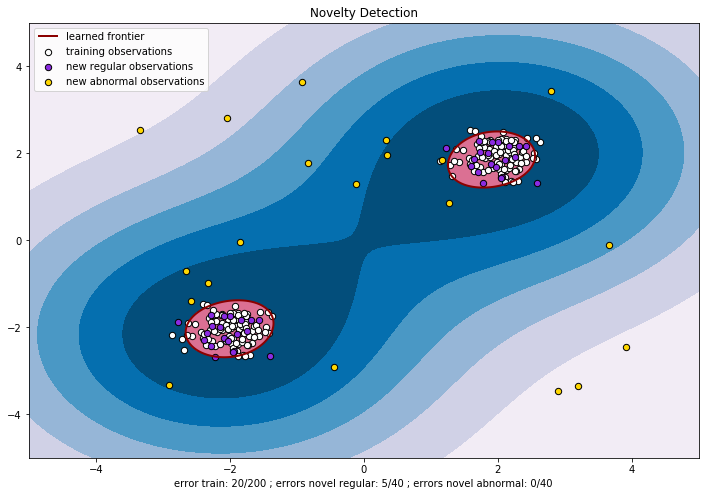

In [69]:
s = 40
fig = plt.figure(figsize=(12, 8))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

In [73]:
type(xx)

numpy.ndarray

In [74]:
dir(xx)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_e

In [75]:
xx.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

## Tips on Practical Use(实际应用中的注意事项)
- **Avoiding data copy**: For **SVC, SVR, NuSVC and NuSVR**, if the data passed to certain methods is not C-ordered contiguous, and double precision, it will be copied before calling the underlying C implementation. You can check whether a given numpy  array is C-contiguous by inspecting its flags attribute. <font color=red>数据是C-contiguous，双精度的可以避免复制，提高效率</font>
- **Kernel cache size**: For **SVC, SVR, nuSVC and NuSVR**, the size of the kernel cache has a strong impact on run times for larger problems. If you have enough RAM avaliable, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB). <font color=red>内存允许的情况下，`cache_size`越大越快</font>
- **Setting C**: C is 1 by default and it's a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to regularize more the estimation. <font color=red>惩罚系数C</font>
- Support Vector Machine algorithms are not scale invariant, so **it is highly recommended to scale your data**. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. <font color=red>归一化</font>
- Parameter nu in NuSVC/OneClassSVM/NuSVR approximates the fraction of training errors and support vectors. <font color=red>异常点比例系数nu</font>
- In SVC, if data for classification are unbalanced(e.g. many positive and few negative), set `class_weight='balanced'` and/or try different penalty parameters C. <font color=red>不平衡样本的处理方法</font>
- The underlying LinearSVC implementation uses a random number generator to select features when fitting the model. It is thus not uncommon, to have slightly different results for the same input data. If thar happens, try with a smaller tol parameter. 
- Using L1 penalization as provided by LinearSVC(loss='l2', penalty='l1', dual=False) yields a sparse solution, i.e. only a subset of feature weights is different from zero and contribute to the decision function. Increasing C yields a more complex model (more feature are selected). The C value that yields a 'null' model (all weights equal to zero) can be calculated using l1_min_c. <font color=red>正则化</font>